# FINAL MODELS ON TEST SETS
---
---

# Imports
---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from xgboost import XGBRegressor

In [4]:
a_df = pd.read_csv('../data/a_test_df.csv')
h_df = pd.read_csv('../data/h_test_df.csv')

In [3]:
with open('../models/a_model_xgb.pkl', 'rb') as f:
    a_model = pickle.load(f)

In [5]:
features = ['elevation', 'bearing', 'time_diff_s', 'total_time_s', 'ele_diff_m',
       'total_ele_change_m', 'dist_diff_km', 'total_dist_km',
       'temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'clouds',
       'wind_speed', 'wind_deg']

# Average Performance Predictions

In [6]:
a_X = a_df[features]
a_preds = a_model.predict(a_X)

In [8]:
a_df['hr_preds'] = a_preds

In [13]:
a_df['hr_preds'].describe()

count    2849.000000
mean      139.997635
std         7.111827
min        68.934532
25%       137.402817
50%       141.667969
75%       144.521179
max       162.258545
Name: hr_preds, dtype: float64

<Figure size 1152x576 with 0 Axes>

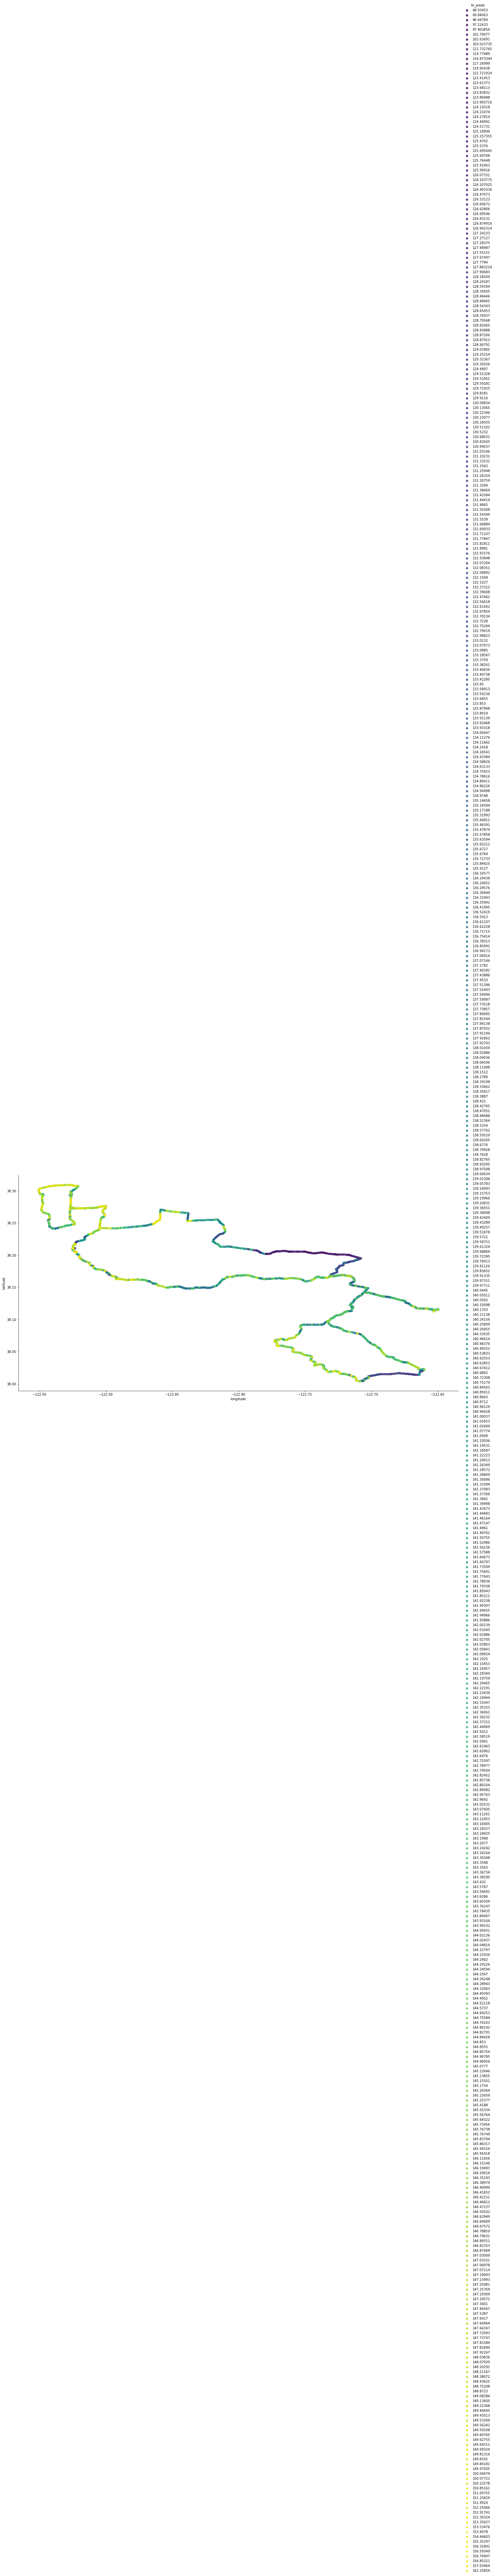

In [14]:
# Use the 'hue' argument to provide a factor variable
plt.figure(figsize = (16, 8))
sns.lmplot( x="longitude", y="latitude", data=a_df, fit_reg=False, 
           hue='hr_preds', 
           palette = 'viridis', 
           height = 10, aspect = 2)

plt.show();